# Modify Pixels

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def display(image):
    plt.imshow(image[:,:,::-1])

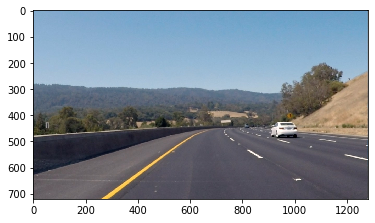

In [3]:
# load a color image
image = cv2.imread('data/curved_lane.jpg')
# matplotlib uses RGB, while opencv uses BGR
# [:,:,::-1] flips the color scheme using numpy sequencing
display(image)
# Connvert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

### You can access pixels using array access with '[]'

In [31]:
# access a pixel value by its row and column coordinates
color_px = image[100,100]
# returns an array of Blue, Green, Red values
print("Channel = {}".format(color_px))
# access only blue pixel
blue = image[100,100,0]
print("Blue pixel = {}".format(blue))

gray_px = gray[100,100]
# returns corresponding intensity
print("Gray pixel = {}".format(gray_px))

Channel = [210 178 143]
Blue pixel = 210
Gray pixel = 184


### Alternatively you can access individual pixel using built in function item()

In [32]:
# access the red pixel in the channel
print(image.item(10,10,2))

# Modify the pixel element's value
image.itemset((10, 10, 2), 100)
print(image.item(10,10,2))

134
100


## Accessing Image Properties

In [33]:
# view shape of images
# color images have BGR for channel: L x W x C
print(image.shape)
# grayscale images don't use channel: L x W
print(gray.shape)

# view image's data type
print(image.dtype)
# large number of errors in OpenCV-Python code is caused by invalid datatype
print(gray.dtype)

(720, 1280, 3)
(720, 1280)
uint8
uint8


## Image ROI

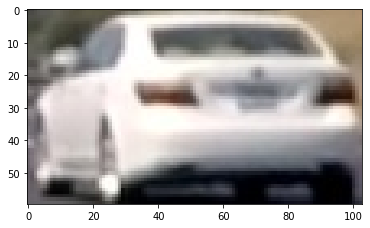

In [90]:
# Get the pixels of the region where the car is
car = image[425:485, 907:1010]
display(car)

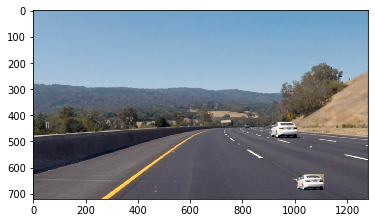

In [99]:
# This is a shallow copy and just modifies the original image
img = image
# Set the pixels of another area equal to the car image
img[625:685, 1007:1110] = car
display(image)

## Splitting and Merging Image Channels

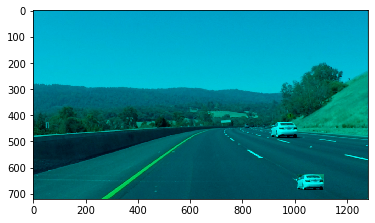

In [101]:
# Split each channel into their own variable
# Blue = 0, Green = 1, Red = 2
b,g,r = cv2.split(image) # very slow function
# Merge them back together
image = cv2.merge((b,g,r))

# alternatively you could just use NumPy indexing
# this can be used to change specific pixels of an entire matrix
image[:,:,2] = 0 # sets all the Red to 0
display(image)

## Image Borders
If you want to create a border around the image, something like a photo frame, you can use cv2.copyMakeBorder() function

(<matplotlib.axes._subplots.AxesSubplot at 0x7f7f485216d0>,
 Text(0.5, 1.0, 'CONSTANT'))

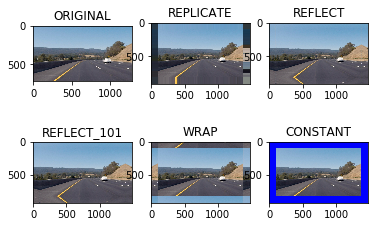

In [4]:
BLUE = [255,0,0]

img1 = cv2.imread('data/curved_lane.jpg')

replicate = cv2.copyMakeBorder(img1,100,100,100,100,cv2.BORDER_REPLICATE)
reflect = cv2.copyMakeBorder(img1,100,100,100,100,cv2.BORDER_REFLECT)
reflect101 = cv2.copyMakeBorder(img1,100,100,100,100,cv2.BORDER_REFLECT_101)
wrap = cv2.copyMakeBorder(img1,100,100,100,100,cv2.BORDER_WRAP)
constant= cv2.copyMakeBorder(img1,100,100,100,100,cv2.BORDER_CONSTANT,value=BLUE)

plt.subplot(231),plt.imshow(img1[:,:,::-1],'gray'),plt.title('ORIGINAL')
plt.subplot(232),plt.imshow(replicate[:,:,::-1],'gray'),plt.title('REPLICATE')
plt.subplot(233),plt.imshow(reflect[:,:,::-1],'gray'),plt.title('REFLECT')
plt.subplot(234),plt.imshow(reflect101[:,:,::-1],'gray'),plt.title('REFLECT_101')
plt.subplot(235),plt.imshow(wrap[:,:,::-1],'gray'),plt.title('WRAP')
plt.subplot(236),plt.imshow(constant[:,:,::-1],'gray'),plt.title('CONSTANT')